In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler , OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [19]:
import pandas as pd

In [20]:
df_train = pd.read_csv("./House pricing data/train.csv")
df_test = pd.read_csv("./House pricing data/test.csv")

In [21]:
df_test.shape

(1459, 80)

In [22]:
cols_to_drop = [
    'Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage', 'Condition2', 'Utilities'
]    
df_train.drop(cols_to_drop, axis=1, inplace=True)
df_test.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
q95 = df_train["SalePrice"].quantile(0.95)
df_train = df_train[df_train["SalePrice"]< q95]

In [24]:
df_train.shape

(1387, 71)

In [25]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
cat = X.select_dtypes(include=['object']).columns
num = X.select_dtypes(include=['int64','float64']).columns
# Ensure numerical data is of float type for consistent processing
X[num] = X[num].astype(float)
df_test[num] = df_test[num].astype(float)

In [26]:
num

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitch

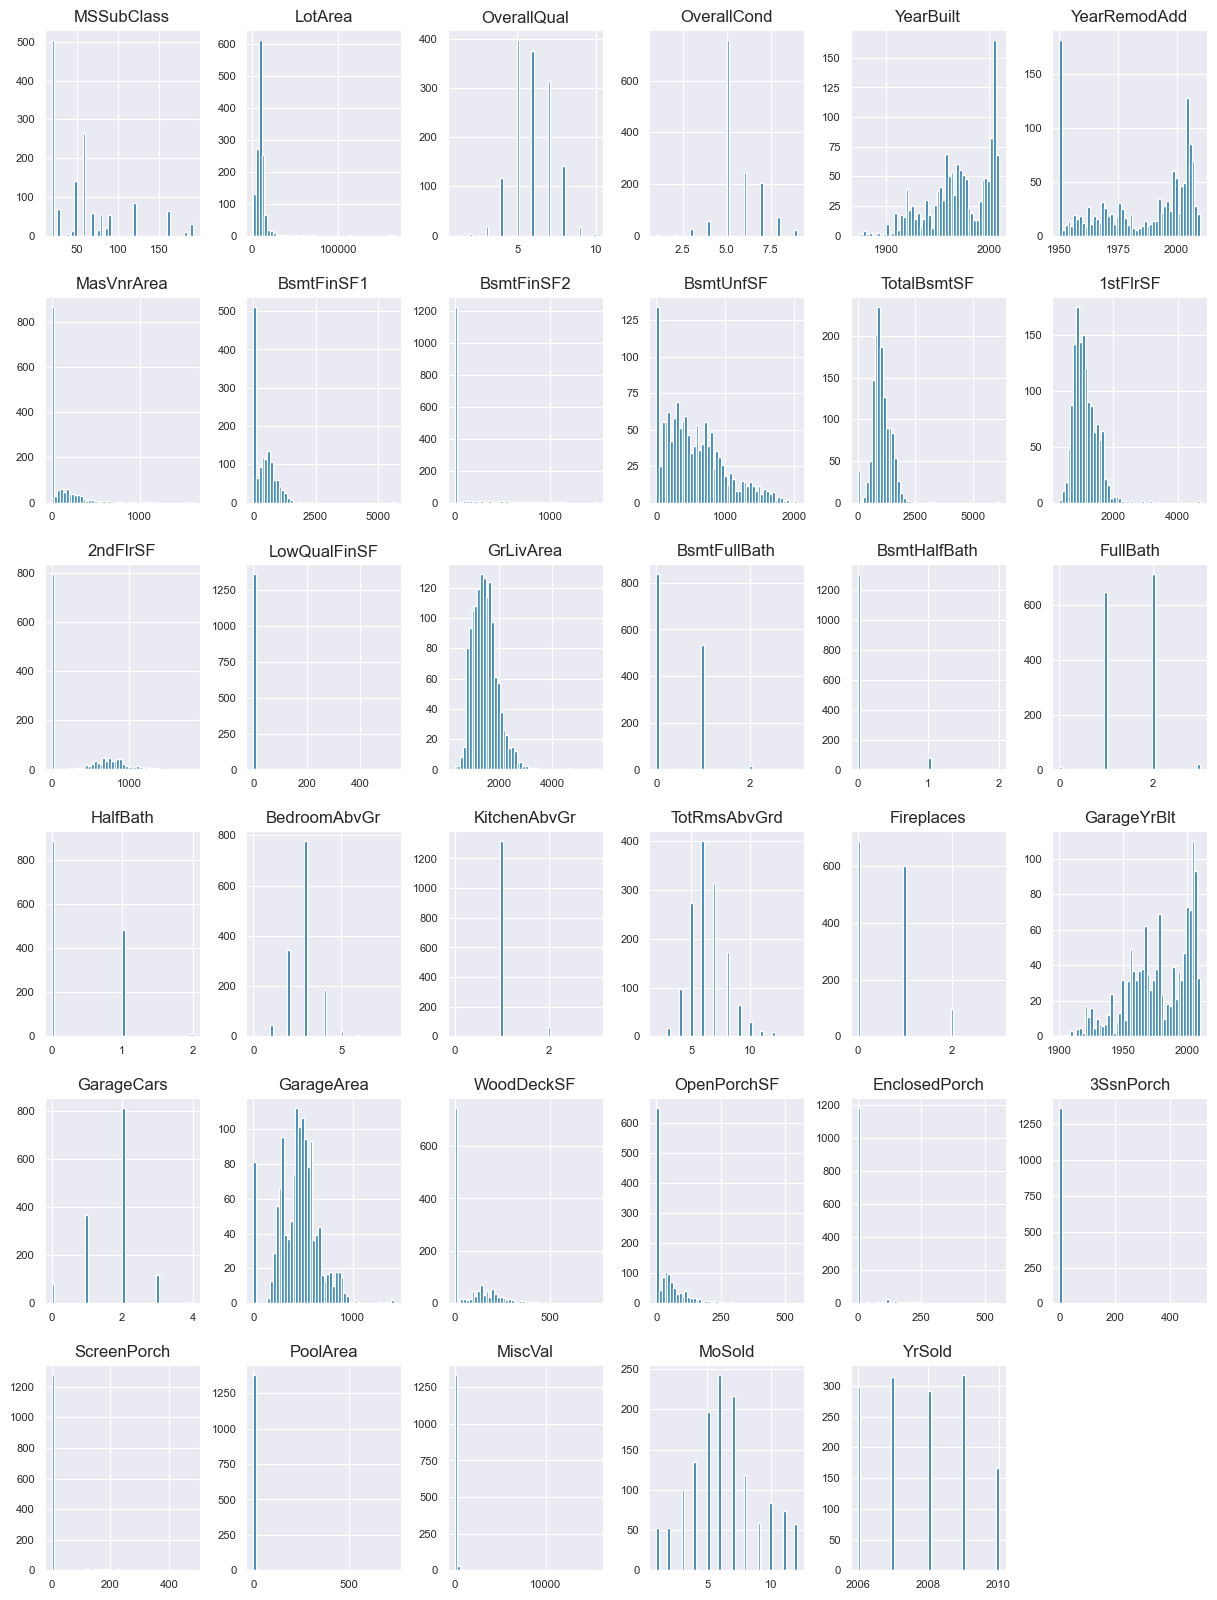

In [27]:
X[num].hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [28]:
result = pd.concat([df_train, df_test], axis=0)

In [29]:
result[cat].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [30]:
label_features = result[cat]

In [31]:
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers= [
        ('num' , num_transformer , num ),
        ('cat', cat_transformer , cat)
    ]
)
# Apply preprocessing transformations to the training and test datasets
X = preprocessor.fit_transform(X)
test_data = preprocessor.transform(df_test)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=False)

In [33]:
xgb_model = XGBRegressor(n_estimators= 500,subsample = 0.8, colsample_bytree = 0.7, learning_rate=0.2, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(np.log(y_test), np.log(y_pred_xgb))
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MSE (XGBoost): {mse_xgb:.2f}")
print(f"RMSE (XGBoost): {rmse_xgb:.2f}")
print(f"R² (XGBoost): {r2_xgb:.2f}")

MSE (XGBoost): 0.02
RMSE (XGBoost): 0.13
R² (XGBoost): 0.86


In [35]:
param_grid_xgb = {
    'n_estimators': [200, 300,400],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 6],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
}

In [36]:
param_grid_xgb = {
    'n_estimators': [200, 300,400],
    'learning_rate': [0.1, 0.2],
    'max_depth': [1, 2, 3, 6],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
}
grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search_xgb.best_params_)
print("Mejor MSE (GridSearch):", -grid_search_xgb.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [37]:
param_grid_xgb = {
    'n_estimators': [200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 6],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
}

In [38]:
from sklearn.model_selection import ParameterGrid
grid = ParameterGrid(param_grid_xgb)
from tqdm import tqdm

In [39]:
xgb_model = XGBRegressor()

In [40]:
from sklearn.metrics import make_scorer

# Функция для вычисления RMSE от логарифмированных значений
def rmse_log(y_true, y_pred):
    y_true_log = np.log1p(y_true)  # логарифмируем истинные значения
    y_pred_log = np.log1p(y_pred)  # логарифмируем предсказания
    mse = np.mean((y_true_log - y_pred_log) ** 2)
    return np.sqrt(mse)

# Создаём scorer
rmse_log_scorer = make_scorer(rmse_log, greater_is_better=False)  # False, так как метрика должна минимизироваться

In [41]:
best_score = -np.inf
best_params = None
best_model = None

In [42]:
for params in tqdm(grid, desc="GridSearch Progress"):
    xgb_model = XGBRegressor()
    xgb_model.set_params(**params)
    scores = cross_val_score(xgb_model, X, y, cv=5, scoring="neg_mean_squared_error")
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        best_model = xgb_model
        print(f"Best score{best_score}")
print(f"Лучшие параметры: {best_params}")

GridSearch Progress:   4%|▍         | 1/24 [00:00<00:19,  1.18it/s]

Best score-360336812.3510227


GridSearch Progress:   8%|▊         | 2/24 [00:01<00:15,  1.39it/s]

Best score-347449271.53525496


GridSearch Progress:  12%|█▎        | 3/24 [00:02<00:13,  1.53it/s]

Best score-346488610.02206206


GridSearch Progress: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]

Лучшие параметры: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [43]:
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = best_model.predict(X_test)
rmse_metrics = rmse_log(y_pred, y_test)
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.8855040669441223

In [45]:
rmse_metrics

0.11868835827756521

In [76]:
# Evaluate the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)
mse_best_xgb = mean_squared_error(np.log(y_test), np.log(y_pred_xgb_best))
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_xgb_best)
print(f"MSE (Best XGBoost): {mse_best_xgb:.2f}")
print(f"RMSE (Best XGBoost): {rmse_best_xgb:.2f}")
print(f"R² (Best XGBoost): {r2_best_xgb:.2f}")

MSE (Best XGBoost): 0.02
RMSE (Best XGBoost): 0.13
R² (Best XGBoost): 0.89


In [75]:
y_test_xgb = best_model.predict(test_data)

In [76]:
y_test_xgb.shape

(1459,)

In [77]:
test_id = pd.read_csv("./House pricing data/test.csv")['Id']

In [78]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [79]:
test_id = pd.read_csv("./House pricing data/test.csv")['Id']
output = pd.DataFrame({
    'Id': test_id,
    'SalePrice': y_test_xgb
})

output.to_csv('./submission_xgb.csv', index=False)

print("Saved 'submission_xgb.csv'.")

Saved 'submission_xgb.csv'.
